# Latar Belakang
TSA atau Transportation Security Administration adalah sebuah departermen keamanan milik Amerika Serikat. Mereka bertugas untuk melakukan pengecekkan terhadap barang bawaan orang yang berpergian keluar masuk negara di Amerika. Namun, dalam proses pengecekkan, dapat terjadi kerusakan pada barang bawaan sehingga pemilik barang tersebut dapat mengajukan tuntutan kepada pihak TSA.

## Pernyataan Masalah
TSA ingin mengetahui **Lokasi bandara dimana TSA harus meningkatkan kualitas pelayanannya**. Informasi ini akan membantu TSA dalam mengurangi jumlah claim yang diterima sehingga dapat mengurangi jumlah pengeluarannya. 

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Dimana bandara mana saja TSA harus meningkatkan kualitas pelayanannya?**

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh TSA.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait waktu,lokasi, dan data-data seputar claim tersebut seperti jumlah dan statusnya dari claim yang diterima oleh TSA

Ada 13 kolom di dalam dataset tsa_claims.csv, yaitu: 
- Claim Number : ID unik dari setiap tuntutan
- Date Received : Tanggal tuntutan tersebut diterima
- Incident Date : Tanggal insiden terjadi
- Airport Code : Kode dari bandara tempat insiden terjadi
- Airport Name : Nama bandara tempat insiden terjadi
- Airline Name : Nama maskapai penerbangan yang bertanggung jawab atas insiden tersebut
- Claim Type : Jenis tuntutan yang diajukan
- Claim Site : Lokasi tuntutan
- Item : Jenis barang
- Claim Amount : Jumlah tuntutan
- Status : Status dari tuntutan 
- Close Amount : Jumlah akhir dari tuntutan
- Disposition : Status dari pembayaran tuntutan 

Berikut 5 baris teratas dari dataset tsa_claims.csv

In [4]:
df=pd.read_csv('tsa_claims.csv')
# display(df.head(),df.tail())
df.head(5)


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

In [5]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (204267, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


In [6]:
# mengganti '-' dengan value NaN
df=df.replace("-",np.nan)
df.tail()


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
204262,2015120427297,20-Nov-15,16-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN
204263,2015123027969,17-Dec-15,2-Dec-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Audio/Video; Home Decor,NaN,NaN,NaN,NaN
204264,2016010428072,22-Dec-15,20-Dec-15,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Clothing,NaN,NaN,NaN,NaN
204265,2016011328300,30-Dec-15,28-Dec-15,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,NaN,NaN,NaN,NaN
204266,2015123128015,31-Dec-15,23-Nov-15,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Personal Accessories,NaN,NaN,NaN,NaN


In [7]:
# Mengganti tanggal menjadi tipe datetime
df["Date Received"]=pd.to_datetime(df["Date Received"], errors='coerce')
df["Incident Date"]=pd.to_datetime(df["Incident Date"], errors='coerce')
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


In [9]:
# Mengubah nilai pada kolom "Claim Amount" dan "Close Amount" menjadi tipe float
df["Claim Amount"]=df["Claim Amount"].str.replace("$","").str.replace(";","").str.replace(" ","")
df["Close Amount"]=df["Close Amount"].str.replace("$","").str.replace(";","").str.replace(" ","")
df["Claim Amount"]=df["Claim Amount"].astype(float)
df["Close Amount"]=df["Close Amount"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   204267 non-null  object        
 1   Date Received  204004 non-null  datetime64[ns]
 2   Incident Date  201920 non-null  datetime64[ns]
 3   Airport Code   195302 non-null  object        
 4   Airport Name   195302 non-null  object        
 5   Airline Name   165646 non-null  object        
 6   Claim Type     196072 non-null  object        
 7   Claim Site     203251 non-null  object        
 8   Item           195878 non-null  object        
 9   Claim Amount   187472 non-null  float64       
 10  Status         191510 non-null  object        
 11  Close Amount   135315 non-null  float64       
 12  Disposition    131359 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 20.3+ MB


In [10]:
df.describe()

,Claim Amount,Close Amount
count,1.874720e+05,135315.000000
mean,1.609638e+07,98.293415
std,6.928745e+09,925.832118
min,0.000000e+00,0.000000
25%,2.665000e+01,0.000000
50%,1.150000e+02,0.000000
75%,3.500000e+02,70.000000
max,3.000000e+12,250000.000000


In [11]:
df.describe(include='object')

,Claim Number,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Status,Disposition
count,204267,195302,195302,165646,196072,203251,195878,191510,131359
unique,204258,464,484,317,10,5,4703,14,3
top,2013121110011,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,Denied,Deny
freq,2,9596,9232,17553,117868,159753,36908,68339,68382


In [12]:
pd.set_option('display.max_colwidth', -1)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0   Claim Number   204258             
1   Date Received  4007               
2   Incident Date  26362              
3   Airport Code   464                
4   Airport Name   484                
5   Airline Name   317                
6   Claim Type     10                 
7   Claim Site     5                  
8   Item           4703               
9   Claim Amount   36116              
10  Status         14                 
11  Close Amount   17162              
12  Disposition    3                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

Secara umum, dapat dilihat bahwa:
* dataset tsa_claims memiliki 13 kolom dan 204.267 baris
* Hampir seluruh kolom (kecuali kolom `Claim Number`) memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* kolom `Claim Number` berisikan id unik untuk tiap claim, sehingga tidak relevan dalam analisis.
* kolom `Claim Amount` dan `Close Amount` memiliki data tipe object. Dari penjelasannya, kedua kolom tersebut seharusnya berisikan data numerik.
* pada kolom `Incident Date`, terdapat data tanggal yang lebih kini dibandingkan dengan kolom `Date Received` pada baris yang sama. Angka ini tidak masuk akal, sehingga akan dibuat kolom baru yang berisikan selisih hari untuk memudahkan analisis.

### Missing Value

In [13]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Claim Number     0.000000 
Date Received    0.128753 
Incident Date    1.148986 
Airport Code     4.388864 
Airport Name     4.388864 
Airline Name     18.907117
Claim Type       4.011906 
Claim Site       0.497388 
Item             4.106880 
Claim Amount     8.222082 
Status           6.245257 
Close Amount     33.755820
Disposition      35.692501
dtype: float64

<AxesSubplot:>

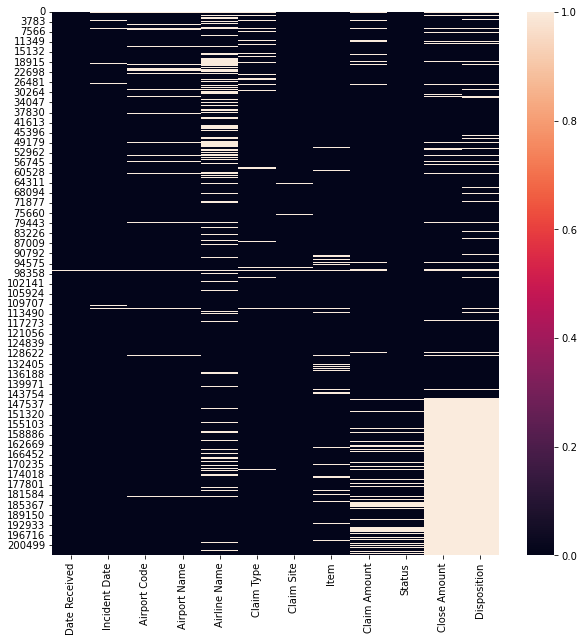

In [14]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['Date Received','Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount','Disposition']].isna())

Secara garis besar:  
* *missing value* di kolom `Airline Name`, `Close Amount`, dan `Disposition` memiliki proporsi yang cukup tinggi (>10%), dengan missing value di kolom `Disposition` mencapai 35.69%.
* *missing value* di kolom `Close Amount` dan `Disposition` memiliki sebaran yang terlihat berkaitan, jika data di `Close Amount` kosong, maka kemungkinan besar data di `Disposition` juga kosong.  

In [15]:
# Mencari tanggal yang tidak valid dengan membaut kolom baru
df['Day Differences'] = (df['Date Received']-df['Incident Date']).dt.days
df


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full,-342.0
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settled,50.00,Settle,-713.0
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle,-660.0
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full,-333.0
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full,-1083.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,2015-11-20,2015-10-16,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other; Clothing,NaN,NaN,NaN,NaN,35.0
204263,2015123027969,2015-12-17,2015-12-02,NaN,NaN,NaN,Property Damage,Checked Baggage,Audio/Video; Home Decor,NaN,NaN,NaN,NaN,15.0
204264,2016010428072,2015-12-22,2015-12-20,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Clothing,NaN,NaN,NaN,NaN,2.0
204265,2016011328300,2015-12-30,2015-12-28,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,NaN,NaN,NaN,NaN,2.0


Dari hasil penambahan kolom selisih tanggal, dapat dilihat bahwa ada yang memiliki value yang negatif. Ini berarti Insiden terjadi setelah tuntutan diajukan. Karena ini tidak masuk akal maka baris-baris yang memiliki selisih tanggal yang negatif akan dihapus

In [16]:
# Menghapus baris yang memiliki value "Day Differences" yang negatif
df= df.drop(df[df['Day Differences'] < 0].index)
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
7,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Clothing - Shoes; belts; accessories; etc.,75.00,Approved,75.0,Approve in Full,42.0
8,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0
9,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,NaN,Passenger Property Loss,Checkpoint,Jewelry - Fine,4457.29,Denied,NaN,Deny,52.0
12,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Checkpoint,Eyeglasses - (including contact lenses),16.71,Approved,17.0,Approve in Full,26.0
13,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Other,Clothing - Shoes; belts; accessories; etc.,450.00,Canceled,NaN,NaN,34.0


Karena TSA hanya menerima tututan dalam waktu paling lama 2 tahun setelah insiden, maka akan di cek terlebih dahulu apakah ada tuntutan yang dilakukan setelah 2 tahun, Jika ada, maka baris tersebut akan dihapus

In [17]:
df[df['Day Differences']>730]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
20489,1117113M,2003-11-17,2001-10-31,BUF,Buffalo Niagara International,Northwest Airlines,Passenger Property Loss,Checked Baggage,Other,33.55,Settled,16.78,Settle,747.0
20984,1121115M,2003-11-21,2001-10-01,LGA,LaGuardia,NaN,Passenger Property Loss,Checked Baggage,Computer - Laptop,1500.00,Canceled,0.00,NaN,781.0
22857,1217395M,2003-12-17,2000-01-01,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Stereo Items & Accessories,1800.00,Denied,0.00,Deny,1446.0
22996,1217135M,2003-12-17,2000-01-01,NaN,NaN,Continental Airlines,Property Damage,Checked Baggage,Other,190.00,Settled,90.00,Settle,1446.0
24541,0107420M,2004-01-07,2000-12-21,PIE,St. Petersburg-Clearwater International,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,40.66,Settled,20.33,Settle,1112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201324,2015082725098,2015-08-17,2013-05-27,MIA,Miami International Airport,NaN,Property Damage,Checkpoint,NaN,0.00,Deny,NaN,NaN,812.0
201765,2015011219786,2015-12-01,2013-06-13,OAK,Metropolitan Oakland International,Alaska Airlines,Passenger Property Loss,Checkpoint,Personal Electronics,0.00,Deny,NaN,NaN,901.0
203951,2015112027019,2015-10-27,2012-02-10,STX,Henry E. Rohlsen,NaN,Personal Injury,Checkpoint,NaN,0.00,Deny,NaN,NaN,1355.0
204184,2015052122662,2015-05-21,2012-06-14,ZZX,Non TSA Airport (motor vehicle),NaN,Motor Vehicle,Motor Vehicle,NaN,NaN,NaN,NaN,NaN,1071.0


In [18]:
df = df.drop(df[df['Day Differences']>730].index)
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
7,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Clothing - Shoes; belts; accessories; etc.,75.00,Approved,75.0,Approve in Full,42.0
8,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0
9,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,NaN,Passenger Property Loss,Checkpoint,Jewelry - Fine,4457.29,Denied,NaN,Deny,52.0
12,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Checkpoint,Eyeglasses - (including contact lenses),16.71,Approved,17.0,Approve in Full,26.0
13,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Other,Clothing - Shoes; belts; accessories; etc.,450.00,Canceled,NaN,NaN,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,2015-11-20,2015-10-16,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other; Clothing,NaN,NaN,NaN,NaN,35.0
204263,2015123027969,2015-12-17,2015-12-02,NaN,NaN,NaN,Property Damage,Checked Baggage,Audio/Video; Home Decor,NaN,NaN,NaN,NaN,15.0
204264,2016010428072,2015-12-22,2015-12-20,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Clothing,NaN,NaN,NaN,NaN,2.0
204265,2016011328300,2015-12-30,2015-12-28,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,NaN,NaN,NaN,NaN,2.0


Mengisi data yang kosong pada kolom `Close Amount` dan `Disposition`

In [19]:
df[['Close Amount', 'Disposition']].isna().sum()

Close Amount    68509
Disposition     72389
dtype: int64

In [20]:
# Mencari hubungan antara status dan disposition
df["Disposition"]=df["Disposition"].astype(str)
df["Status"]=df["Status"].astype(str)
pd.crosstab(df['Disposition'],df['Status'],normalize='index')

Status,Approve in Full,Approved,Canceled,Claim entered,Claim has been assigned for further investigation,Closed as a contractor claim,Denied,Deny,In litigation,In review,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,Pending response from claimant,Settle,Settled,nan
Disposition,,,,,,,,,,,,,,,
Approve in Full,0.000000,0.999711,0.000087,0.000000,0.000000,0.000000,0.000000,0.00000,0.000058,0.000029,0.000115,0.000000,0.000000,0.000000,0.000000
Deny,0.000000,0.000000,0.000030,0.000000,0.000000,0.000000,0.998786,0.00000,0.000932,0.000015,0.000237,0.000000,0.000000,0.000000,0.000000
Settle,0.000000,0.000000,0.000145,0.000000,0.000000,0.000000,0.000000,0.00000,0.000145,0.000000,0.000000,0.000036,0.000000,0.999675,0.000000
nan,0.170109,0.000000,0.095235,0.000193,0.000014,0.017793,0.000580,0.38825,0.000483,0.000097,0.073064,0.000000,0.079349,0.000000,0.174833


Mengisi mising value pada disposition dapat menggunakan status

In [21]:
# Mengubah status 'Deny' menjadi Denied untuk menyamakannya dan mengisi 'Close Amount' dan 'Disposition'nya
df.loc[(df['Status'] =='Deny'),['Status']]='Denied'
df.loc[(df['Status'] =='Denied'),['Close Amount']]=0
df.loc[(df['Status'] =='Denied'),['Disposition']]='Deny'
df[df.values  == "Denied"]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
9,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,NaN,Passenger Property Loss,Checkpoint,Jewelry - Fine,4457.29,Denied,0.0,Deny,52.0
14,0616771L,2002-07-12,NaT,NaN,NaN,NaN,NaN,Other,Clothing - Shoes; belts; accessories; etc.,NaN,Denied,0.0,Deny,NaN
15,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0
16,15324,2002-07-12,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,NaN,Other,Luggage (all types including footlockers),50.00,Denied,0.0,Deny,30.0
17,15361,2002-07-15,2002-03-11,NaN,NaN,NaN,Personal Injury,Motor Vehicle,Luggage (all types including footlockers),110000.00,Denied,0.0,Deny,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204161,2015072023983,2015-07-13,2015-07-06,YNG,Youngstown-Warren Regional,Allegiant Air,Passenger Property Loss,Checked Baggage,Baggage/Cases/Purses,0.00,Denied,0.0,Deny,7.0
204165,2015042722126,2015-04-27,2015-04-22,YUM,Yuma International Airport,USAir,Passenger Property Loss,Checked Baggage,Computer & Accessories,0.00,Denied,0.0,Deny,5.0
204169,2015102126149,2015-10-01,2015-09-30,YUM,Yuma International Airport,American Airlines,Passenger Property Loss,Checkpoint,Currency,0.00,Denied,0.0,Deny,1.0
204181,2015050822378,2015-05-05,2015-04-09,ZZX,Non TSA Airport (motor vehicle),NaN,Motor Vehicle,Motor Vehicle,Other,0.00,Denied,0.0,Deny,26.0


In [22]:
# Mengisi 'Close Amount' dan 'Disposition' untuk yang status 'Canceled'
df.loc[(df['Status'] =='Canceled'),['Close Amount']]=0
df.loc[(df['Status'] =='Canceled'),['Disposition']]='Canceled'
df[df.values  == "Canceled"]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
8,14268,2002-06-20,2002-06-16 00:00:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,0.0,Canceled,4.0
8,14268,2002-06-20,2002-06-16 00:00:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,0.0,Canceled,4.0
13,13334,2002-07-08,2002-06-04 00:00:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Other,Clothing - Shoes; belts; accessories; etc.,450.00,Canceled,0.0,Canceled,34.0
13,13334,2002-07-08,2002-06-04 00:00:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Other,Clothing - Shoes; belts; accessories; etc.,450.00,Canceled,0.0,Canceled,34.0
24,16403,2002-08-12,2002-07-19 00:00:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Delta Air Lines,NaN,Other,Luggage (all types including footlockers),380.00,Canceled,0.0,Canceled,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145082,2010010567149,2009-12-30,2009-12-12 05:00:00,PHX,Phoenix Sky Harbor International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,266.24,Canceled,0.0,Canceled,17.0
145083,2010010567170,2009-12-30,2009-12-10 07:30:00,OAK,Metropolitan Oakland International,Hawaiian Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,100.00,Canceled,0.0,Canceled,19.0
145083,2010010567170,2009-12-30,2009-12-10 07:30:00,OAK,Metropolitan Oakland International,Hawaiian Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,100.00,Canceled,0.0,Canceled,19.0
145137,2010011167412,2009-12-31,2009-12-26 00:00:00,MCO,Orlando International Airport,Westjet Airlines Ltd,Passenger Property Loss,Checked Baggage,Cameras - Digital,487.31,Canceled,0.0,Canceled,5.0


In [23]:
df[['Close Amount', 'Disposition']].isna().sum()

Close Amount    36326
Disposition     0    
dtype: int64

In [24]:
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
7,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Clothing - Shoes; belts; accessories; etc.,75.00,Approved,75.0,Approve in Full,42.0
8,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,0.0,Canceled,4.0
9,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,NaN,Passenger Property Loss,Checkpoint,Jewelry - Fine,4457.29,Denied,0.0,Deny,52.0
12,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Checkpoint,Eyeglasses - (including contact lenses),16.71,Approved,17.0,Approve in Full,26.0
13,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Other,Clothing - Shoes; belts; accessories; etc.,450.00,Canceled,0.0,Canceled,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,2015-11-20,2015-10-16,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other; Clothing,NaN,nan,NaN,nan,35.0
204263,2015123027969,2015-12-17,2015-12-02,NaN,NaN,NaN,Property Damage,Checked Baggage,Audio/Video; Home Decor,NaN,nan,NaN,nan,15.0
204264,2016010428072,2015-12-22,2015-12-20,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Clothing,NaN,nan,NaN,nan,2.0
204265,2016011328300,2015-12-30,2015-12-28,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,NaN,nan,NaN,nan,2.0


Secara logika, orang yang melakukan penuntutan seharusnya tahu bandara tempat terjadinya insiden dan maskapai yang bertanggung jawab. Maka dari itu baris yang memiliki value NaN pada ketiga kolom tersebut akan dihapus. Selain itu, secara logika pasti ada jumlah uang yang ingin didapatkannya sebagai ganti rugi. Oleh karena itu pada kolom claim amount, jika pada kolom tersebut memiliki value NaN, maka baris itu akan dihapus juga

In [25]:
df = df.dropna(how='all',subset=['Airport Code','Airport Name','Airline Name'])
df = df.dropna(subset=['Claim Amount'])
df


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
7,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Clothing - Shoes; belts; accessories; etc.,75.00,Approved,75.0,Approve in Full,42.0
8,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,0.0,Canceled,4.0
9,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,NaN,Passenger Property Loss,Checkpoint,Jewelry - Fine,4457.29,Denied,0.0,Deny,52.0
12,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Checkpoint,Eyeglasses - (including contact lenses),16.71,Approved,17.0,Approve in Full,26.0
13,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Other,Clothing - Shoes; belts; accessories; etc.,450.00,Canceled,0.0,Canceled,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204189,2015070223650,2015-06-29,2015-05-08,ZZX,Non TSA Airport (motor vehicle),NaN,Employee Loss (MPCECA),Motor Vehicle,NaN,250.00,Approve in Full,NaN,nan,52.0
204202,2015092425588,2015-09-10,2015-08-31,ZZX,Non TSA Airport (motor vehicle),NaN,Motor Vehicle,Other,NaN,656.56,Approve in Full,NaN,nan,10.0
204203,2015102026116,2015-09-29,2015-09-22,ZZX,Non TSA Airport (motor vehicle),NaN,Motor Vehicle,Motor Vehicle,NaN,1520.85,Approve in Full,NaN,nan,7.0
204204,2015101326019,2015-10-13,2015-07-16,ZZX,Non TSA Airport (motor vehicle),NaN,Motor Vehicle,Motor Vehicle,NaN,643.32,Approve in Full,NaN,nan,89.0


In [26]:
pd.crosstab(df['Disposition'],df['Status'],normalize='index')

Status,Approve in Full,Approved,Canceled,Claim has been assigned for further investigation,Closed as a contractor claim,Denied,In litigation,In review,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,Pending response from claimant,Settle,Settled
Disposition,,,,,,,,,,,,
Approve in Full,0.000000,0.999851,0.0,0.000000,0.000000,0.000000,0.000059,0.000030,0.000059,0.000000,0.00000,0.000000
Canceled,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Deny,0.000000,0.000000,0.0,0.000000,0.000000,0.999293,0.000655,0.000011,0.000042,0.000000,0.00000,0.000000
Settle,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000150,0.000000,0.000000,0.000038,0.00000,0.999812
nan,0.593961,0.000000,0.0,0.000048,0.058412,0.000000,0.001688,0.000338,0.068493,0.000000,0.27706,0.000000


In [27]:
#Menyamakan dan mengisi Disposition untuk Status 'Settled' dan 'Approved'
df.loc[(df['Status'] =='Settle'),['Status']]='Settled'
df.loc[(df['Status'] =='Settled'),['Disposition']]='Settle'

df.loc[(df['Status'] =='Approve in Full'),['Status']]='Approved'
df.loc[(df['Status'] =='Approved'),['Disposition']]='Approve in Full'

In [28]:
# Membuat kolom selisih untuk membantu dalam analisis
df['Amount Differences'] = df['Claim Amount'] - df['Close Amount']
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
7,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Clothing - Shoes; belts; accessories; etc.,75.00,Approved,75.0,Approve in Full,42.0,0.00
8,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,0.0,Canceled,4.0,2270.09
9,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,NaN,Passenger Property Loss,Checkpoint,Jewelry - Fine,4457.29,Denied,0.0,Deny,52.0,4457.29
12,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Checkpoint,Eyeglasses - (including contact lenses),16.71,Approved,17.0,Approve in Full,26.0,-0.29
13,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Other,Clothing - Shoes; belts; accessories; etc.,450.00,Canceled,0.0,Canceled,34.0,450.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204189,2015070223650,2015-06-29,2015-05-08,ZZX,Non TSA Airport (motor vehicle),NaN,Employee Loss (MPCECA),Motor Vehicle,NaN,250.00,Approved,NaN,Approve in Full,52.0,NaN
204202,2015092425588,2015-09-10,2015-08-31,ZZX,Non TSA Airport (motor vehicle),NaN,Motor Vehicle,Other,NaN,656.56,Approved,NaN,Approve in Full,10.0,NaN
204203,2015102026116,2015-09-29,2015-09-22,ZZX,Non TSA Airport (motor vehicle),NaN,Motor Vehicle,Motor Vehicle,NaN,1520.85,Approved,NaN,Approve in Full,7.0,NaN
204204,2015101326019,2015-10-13,2015-07-16,ZZX,Non TSA Airport (motor vehicle),NaN,Motor Vehicle,Motor Vehicle,NaN,643.32,Approved,NaN,Approve in Full,89.0,NaN


In [29]:
#Mencari Jumlah dari selisih 'Claim Amount' dan 'Close Amount'
ap = df[df.values  == "Approved"]['Amount Differences']
s = ap.sum()
s

30173.03

In [30]:
#Mencari Jumlah dari 'Claim Amount'
ad = df[df.values  == "Approved"]['Claim Amount']
a = ad.sum()
a

7118652.859999999

In [31]:
#Mencari persentase perbedaan antara Claim Amount dan Cloase Amount
p = (s/a)*100
p

0.4238587074465098

In [32]:
#Memasukan Nilai Close Amount
t = (100-p)/100
df.loc[(df['Status'] =='Approved'),['Close Amount']]=df['Claim Amount']*t
df[df.values  == "Approved"]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
7,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Clothing - Shoes; belts; accessories; etc.,75.00,Approved,74.682106,Approve in Full,42.0,0.00
12,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Checkpoint,Eyeglasses - (including contact lenses),16.71,Approved,16.639173,Approve in Full,26.0,-0.29
26,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.349125,Approve in Full,40.0,0.44
29,14907,2002-09-09,2002-06-28,SDF,Louisville International,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),275.00,Approved,273.834389,Approve in Full,73.0,0.00
30,17892,2002-09-09,2002-08-23,RDU,Raleigh-Durham International,USAir,Property Damage,Checkpoint,Luggage (all types including footlockers),30.00,Approved,29.872842,Approve in Full,17.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204187,2015061123082,2015-06-02,2015-05-01,ZZX,Non TSA Airport (motor vehicle),NaN,Property Damage,Motor Vehicle,NaN,777.12,Approved,773.826109,Approve in Full,32.0,NaN
204189,2015070223650,2015-06-29,2015-05-08,ZZX,Non TSA Airport (motor vehicle),NaN,Employee Loss (MPCECA),Motor Vehicle,NaN,250.00,Approved,248.940353,Approve in Full,52.0,NaN
204202,2015092425588,2015-09-10,2015-08-31,ZZX,Non TSA Airport (motor vehicle),NaN,Motor Vehicle,Other,NaN,656.56,Approved,653.777113,Approve in Full,10.0,NaN
204203,2015102026116,2015-09-29,2015-09-22,ZZX,Non TSA Airport (motor vehicle),NaN,Motor Vehicle,Motor Vehicle,NaN,1520.85,Approved,1514.403745,Approve in Full,7.0,NaN


Untuk settled karena tidak ada cara untuk mencari close amountnya maka  baris yang memiliki value NaN akan dihapus

In [33]:
pd.crosstab(df['Disposition'],df['Status'],normalize='index')

Status,Approved,Canceled,Claim has been assigned for further investigation,Closed as a contractor claim,Denied,In litigation,In review,Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.,Pending response from claimant,Settled
Disposition,,,,,,,,,,
Approve in Full,0.999891,0.0,0.000000,0.00000,0.000000,0.000044,0.000022,0.000044,0.000000,0.000000
Canceled,0.000000,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Deny,0.000000,0.0,0.000000,0.00000,0.999293,0.000655,0.000011,0.000042,0.000000,0.000000
Settle,0.000000,0.0,0.000000,0.00000,0.000000,0.000124,0.000000,0.000000,0.000031,0.999846
nan,0.000000,0.0,0.000374,0.45288,0.000000,0.013089,0.002618,0.531040,0.000000,0.000000


In [34]:
df.loc[(df['Status'] =='Closed as a contractor claim'),['Disposition']]='In Process'
df.loc[(df['Status'] =='Claim has been assigned for further investigation'),['Disposition']]='In Process'
df.loc[(df['Status'] =='In litigation'),['Disposition']]='In Process'
df.loc[(df['Status'] =='In review'),['Disposition']]='In Process'
df.loc[(df['Status'] =='Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.'),['Disposition']]='In Process'


df = df.dropna(df[df.values =='Settled'])
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
7,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Clothing - Shoes; belts; accessories; etc.,75.00,Approved,74.682106,Approve in Full,42.0,0.00
8,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,0.000000,Canceled,4.0,2270.09
9,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,NaN,Passenger Property Loss,Checkpoint,Jewelry - Fine,4457.29,Denied,0.000000,Deny,52.0,4457.29
12,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Checkpoint,Eyeglasses - (including contact lenses),16.71,Approved,16.639173,Approve in Full,26.0,-0.29
13,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Other,Clothing - Shoes; belts; accessories; etc.,450.00,Canceled,0.000000,Canceled,34.0,450.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204189,2015070223650,2015-06-29,2015-05-08,ZZX,Non TSA Airport (motor vehicle),NaN,Employee Loss (MPCECA),Motor Vehicle,NaN,250.00,Approved,248.940353,Approve in Full,52.0,NaN
204202,2015092425588,2015-09-10,2015-08-31,ZZX,Non TSA Airport (motor vehicle),NaN,Motor Vehicle,Other,NaN,656.56,Approved,653.777113,Approve in Full,10.0,NaN
204203,2015102026116,2015-09-29,2015-09-22,ZZX,Non TSA Airport (motor vehicle),NaN,Motor Vehicle,Motor Vehicle,NaN,1520.85,Approved,1514.403745,Approve in Full,7.0,NaN
204204,2015101326019,2015-10-13,2015-07-16,ZZX,Non TSA Airport (motor vehicle),NaN,Motor Vehicle,Motor Vehicle,NaN,643.32,Approved,640.593232,Approve in Full,89.0,NaN


Karena tidak ada cara untuk mandapatkan close amount untuk settled dan yang lain, maka row yang memiliki value NaN pada clos amount akan dihapus

In [35]:
df =df.dropna(subset=['Close Amount'])
df.isna().sum()


Claim Number          0    
Date Received         108  
Incident Date         420  
Airport Code          1676 
Airport Name          1676 
Airline Name          28995
Claim Type            5554 
Claim Site            330  
Item                  5498 
Claim Amount          0    
Status                0    
Close Amount          0    
Disposition           0    
Day Differences       528  
Amount Differences    12417
dtype: int64

Incident Date dan Date Received juga tidak dapat dicari sehingga yang memiliki value NaN akan di drop. Selain itu airport code dan airport name juga akan di drop karena secara logika, seharusnya penumpang mengetahui bandara dimana insiden terjadi 

In [36]:
df =df.dropna(subset=['Incident Date','Date Received','Airport Code','Airport Name' ], how='any')
df.isna().sum()

Claim Number          0    
Date Received         0    
Incident Date         0    
Airport Code          0    
Airport Name          0    
Airline Name          28791
Claim Type            5188 
Claim Site            318  
Item                  5466 
Claim Amount          0    
Status                0    
Close Amount          0    
Disposition           0    
Day Differences       0    
Amount Differences    12412
dtype: int64

In [37]:
#Membetulkan kolom Amount Differences
df['Amount Differences'] = df['Claim Amount'] - df['Close Amount']
df.isna().sum()

Claim Number          0    
Date Received         0    
Incident Date         0    
Airport Code          0    
Airport Name          0    
Airline Name          28791
Claim Type            5188 
Claim Site            318  
Item                  5466 
Claim Amount          0    
Status                0    
Close Amount          0    
Disposition           0    
Day Differences       0    
Amount Differences    0    
dtype: int64

Secara logika, tidak mungkin seseorang melakukan penuntutan tanpa menuliskan kenapa/hal apa yang membuatnya melakukan penuntutan. Karena itu baris dari kolom 'Claim Type','Claim Site','Item' yang ketigasnya memiliki value NaN akan dihapus

In [38]:
df =df.dropna(subset=['Claim Type','Claim Site','Item'], how='all')
df.isna().sum()

Claim Number          0    
Date Received         0    
Incident Date         0    
Airport Code          0    
Airport Name          0    
Airline Name          28781
Claim Type            5156 
Claim Site            286  
Item                  5434 
Claim Amount          0    
Status                0    
Close Amount          0    
Disposition           0    
Day Differences       0    
Amount Differences    0    
dtype: int64

In [39]:
#Mengisi Airline Name bwerdasarkan modus airline name pada airportnya
df['Airline Name']=df.groupby('Airport Name')['Airline Name'].apply(lambda x: x.fillna(x.describe(include='object')['top']))
df.isna().sum()

Claim Number          0   
Date Received         0   
Incident Date         0   
Airport Code          0   
Airport Name          0   
Airline Name          160 
Claim Type            5156
Claim Site            286 
Item                  5434
Claim Amount          0   
Status                0   
Close Amount          0   
Disposition           0   
Day Differences       0   
Amount Differences    0   
dtype: int64

In [40]:
#Menghapus baris airline name yang masih memiliki value NaN
df =df.dropna(subset=['Airline Name'])
df.isna().sum()

Claim Number          0   
Date Received         0   
Incident Date         0   
Airport Code          0   
Airport Name          0   
Airline Name          0   
Claim Type            5153
Claim Site            285 
Item                  5342
Claim Amount          0   
Status                0   
Close Amount          0   
Disposition           0   
Day Differences       0   
Amount Differences    0   
dtype: int64

In [41]:
df.isna().sum()/df.shape[0]*100

Claim Number          0.000000
Date Received         0.000000
Incident Date         0.000000
Airport Code          0.000000
Airport Name          0.000000
Airline Name          0.000000
Claim Type            3.009719
Claim Site            0.166460
Item                  3.120108
Claim Amount          0.000000
Status                0.000000
Close Amount          0.000000
Disposition           0.000000
Day Differences       0.000000
Amount Differences    0.000000
dtype: float64

In [42]:
pd.crosstab(df['Claim Type'],df['Airline Name'],normalize='index')

Airline Name,ATA Aerocondor,Aer Lingus,Aero California,Aero Flot,Aero Lineas Mexicanas J S S A De C V,Aero Lloyd,Aero Mexico,AeroGal,Aeroflot Russian International,Aerolineas Argentinas,...,Vision Airlines,Volaris Airlines,Webjet,Western Pacific Airlines Inc Westpac,Westjet Airlines Ltd,Westjet Airlines Ltd,Wiggins Airways,XL Airways,Xtra Airways,vivaAerobus
Claim Type,,,,,,,,,,,,,,,,,,,,,
Complaint,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000
Employee Loss (MPCECA),0.002268,0.002268,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000
Motor Vehicle,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.008
Passenger Property Loss,0.002403,0.000601,0.000000,0.000236,0.00002,0.000000,0.001083,0.00003,0.000039,0.000128,...,0.000089,0.000108,0.000020,0.000010,0.000719,0.000719,0.00001,0.00001,0.000049,0.000
Passenger Theft,0.002257,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000
Personal Injury,0.000000,0.001145,0.000000,0.000000,0.00000,0.000000,0.003436,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.001145,0.000000,0.00000,0.00000,0.000000,0.000
Property Damage,0.001006,0.000367,0.000048,0.000128,0.00000,0.000016,0.000655,0.00000,0.000048,0.000096,...,0.000160,0.000064,0.000016,0.000032,0.000799,0.000831,0.00000,0.00000,0.000048,0.000
Wrongful Death,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000


In [43]:
# Memasukkan Claim Type dan Claim Site berdasarkan modus pada airlinenya masing masing
df['Claim Type']=df.groupby('Airline Name')['Claim Type'].apply(lambda x: x.fillna(x.describe(include='object')['top']))
df['Claim Site']=df.groupby('Airline Name')['Claim Site'].apply(lambda x: x.fillna(x.describe(include='object')['top']))
df.isna().sum()

Claim Number          0   
Date Received         0   
Incident Date         0   
Airport Code          0   
Airport Name          0   
Airline Name          0   
Claim Type            4   
Claim Site            1   
Item                  5342
Claim Amount          0   
Status                0   
Close Amount          0   
Disposition           0   
Day Differences       0   
Amount Differences    0   
dtype: int64

In [44]:
# Memasukkan Item berdasarkan modus item claim typenya
df['Item']=df.groupby('Claim Type')['Item'].apply(lambda x: x.fillna(x.describe(include='object')['top']))
df.isna().sum()

Claim Number          0
Date Received         0
Incident Date         0
Airport Code          0
Airport Name          0
Airline Name          0
Claim Type            4
Claim Site            1
Item                  6
Claim Amount          0
Status                0
Close Amount          0
Disposition           0
Day Differences       0
Amount Differences    0
dtype: int64

In [45]:
#Karena sisa NaN sedikit sekali maka baris yang masih memiliki value NaN akan di drop
df =df.dropna()
df.isna().sum()

Claim Number          0
Date Received         0
Incident Date         0
Airport Code          0
Airport Name          0
Airline Name          0
Claim Type            0
Claim Site            0
Item                  0
Claim Amount          0
Status                0
Close Amount          0
Disposition           0
Day Differences       0
Amount Differences    0
dtype: int64

## Data yang sudah bersih
sekilas informasi dari data yang sudah dibersihkan

In [46]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(171206, 15)


,dataFeatures,dataType,null,unique,uniqueSample
0,Claim Number,object,0,171206,"[0624040M, 2013032602747]"
1,Date Received,datetime64[ns],0,3798,"[2006-03-13T00:00:00.000000000, 2015-05-11T00:00:00.000000000]"
2,Incident Date,datetime64[ns],0,21035,"[2011-11-03T09:45:00.000000000, 2013-04-16T01:20:00.000000000]"
3,Airport Code,object,0,442,"[ALS, LWB]"
4,Airport Name,object,0,460,"[Portland International Jetport, Austin-Bergstrom International Airport]"
5,Airline Name,object,0,301,"[China Airlines , Reno Air ]"
6,Claim Type,object,0,7,"[Personal Injury, Employee Loss (MPCECA)]"
7,Claim Site,object,0,5,"[Checked Baggage, Bus Station]"
8,Item,object,0,4376,"[Boxes - Jewelry; Cigarette; Music; etc.; Luggage (all types including footlockers); Medicines, Cameras - Digital; Cameras - Non-electronic (Camera supplies; lenses; projectors; etc.); Computer - Laptop; Other]"
9,Claim Amount,float64,0,33485,"[428.8, 2585.0]"


# Data Analysis
Analisis untuk mencari tahu **lokasi bandara dimana TSA harus meningkatkan kualitas pelayanannya**.  

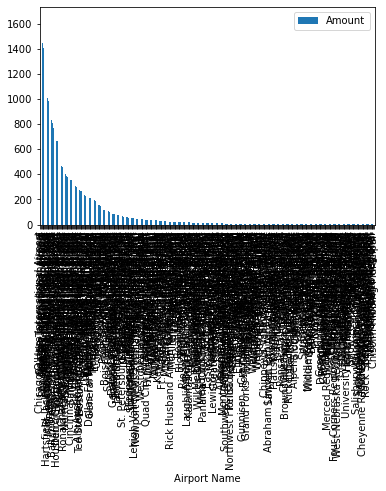

In [47]:
#Mencari bandara-bandara dengan jumlah insiden yang banyak



an = df[(df.values  == "Approved")]
amount = an.groupby(['Airport Name'])[['Airport Name']].count()

Header = ['Amount']
amount.columns = Header
an=an.sort_values('Airport Name',ascending=True)

amount['Airport Name']= an['Airport Name'].unique()
amount = amount.sort_values('Amount',ascending=False)
plotData = amount
ax = plotData.plot.bar()



In [48]:
amount.describe()

,Amount
count,406.000000
mean,111.320197
std,259.225277
min,1.000000
25%,3.000000
50%,11.000000
75%,64.000000
max,1652.000000


In [65]:
#Mencari bandara bandara yang jumlah insiden lebih tinggi dari rata-rata seluruh insiden
std = amount['Amount'].std()
amount[amount['Amount']>std]

,Amount,Airport Name
Airport Name,,
Los Angeles International Airport,1468,Los Angeles International Airport
Newark International Airport,1146,Newark International Airport
Chicago O'Hare International Airport,974,Chicago O'Hare International Airport
John F. Kennedy International,862,John F. Kennedy International
Seattle-Tacoma International,828,Seattle-Tacoma International
Phoenix Sky Harbor International,720,Phoenix Sky Harbor International
Miami International Airport,712,Miami International Airport
Orlando International Airport,707,Orlando International Airport
Hartsfield-Jackson Atlanta International Airport,698,Hartsfield-Jackson Atlanta International Airport


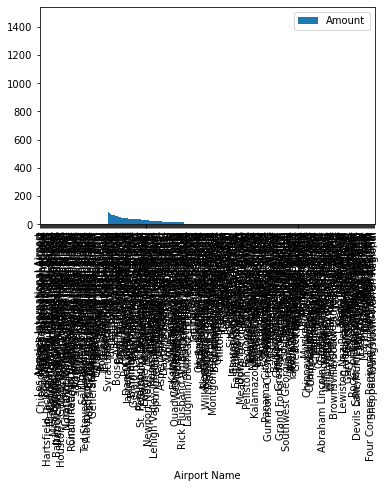

In [50]:
#Mencari bandara-bandara dengan jumlah insiden yang banyak
an = df[(df.values  == "Settled")]
amount = an.groupby(['Airport Name'])[['Airport Name']].count()

Header = ['Amount']
amount.columns = Header
an=an.sort_values('Airport Name',ascending=True)

amount['Airport Name']= an['Airport Name'].unique()
amount = amount.sort_values('Amount',ascending=False)
plotData = amount
ax = plotData.plot.bar()

In [51]:
amount.describe()

,Amount
count,337.000000
mean,77.044510
std,181.328352
min,1.000000
25%,2.000000
50%,9.000000
75%,47.000000
max,1468.000000


In [52]:
#Mencari bandara bandara yang jumlah insiden lebih tinggi dari rata-rata seluruh insiden
std = amount['Amount'].std()
amount[amount['Amount']>std]

,Amount,Airport Name
Airport Name,,
Los Angeles International Airport,1468,Los Angeles International Airport
Newark International Airport,1146,Newark International Airport
Chicago O'Hare International Airport,974,Chicago O'Hare International Airport
John F. Kennedy International,862,John F. Kennedy International
Seattle-Tacoma International,828,Seattle-Tacoma International
...,...,...
El Paso International Airport,93,El Paso International Airport
Greenville-Spartanburg,89,Greenville-Spartanburg
Reno/Tahoe International,87,Reno/Tahoe International


Dari hasil diatas dapat dilihat bandara-bandara yang memiliki jumlah insiden yang tinggi

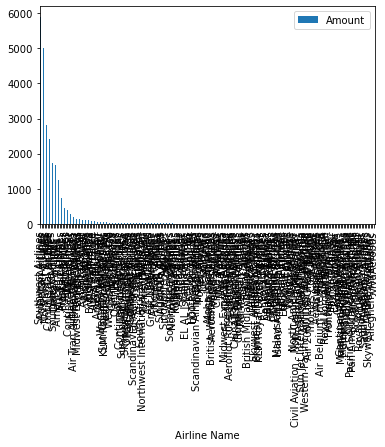

In [53]:
#Mencari maskapai penerbangan dengan jumlah insiden yang banyak
an2 = df[(df.values  == "Approved")]
amount2 = an2.groupby(['Airline Name'])[['Airline Name']].count()

Header = ['Amount']
amount2.columns = Header
an2=an2.sort_values('Airline Name',ascending=True)

amount2['Airline Name']= an2['Airline Name'].unique()
amount2 = amount2.sort_values('Amount',ascending=False)
plotData = amount2
ax2 = plotData.plot.bar()

In [54]:
amount2.describe()

,Amount
count,223.000000
mean,202.672646
std,779.163050
min,1.000000
25%,2.000000
50%,5.000000
75%,18.000000
max,5900.000000


In [55]:
#Mencari maskapai penerbangan yang jumlah insiden lebih tinggi dari rata-rata seluruh insiden
std = amount2['Amount'].std()
amount2[amount2['Amount']>std]

,Amount,Airline Name
Airline Name,,
Southwest Airlines,5900,Southwest Airlines
American Airlines,5064,American Airlines
Delta Air Lines,4996,Delta Air Lines
UAL,4462,UAL
Northwest Airlines,2802,Northwest Airlines
USAir,2704,USAir
Continental Airlines,2412,Continental Airlines
Jet Blue,1798,Jet Blue
Alaska Airlines,1744,Alaska Airlines


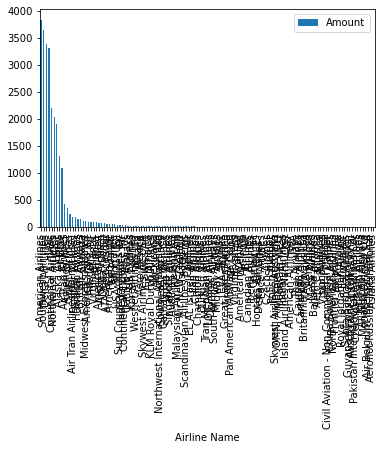

In [56]:
#Mencari maskapai penerbangan dengan jumlah insiden yang banyak
an2 = df[(df.values  == "Settled")]
amount2 = an2.groupby(['Airline Name'])[['Airline Name']].count()

Header = ['Amount']
amount2.columns = Header
an2=an2.sort_values('Airline Name',ascending=True)

amount2['Airline Name']= an2['Airline Name'].unique()
amount2 = amount2.sort_values('Amount',ascending=False)
plotData = amount2
ax2 = plotData.plot.bar()

In [57]:
amount2.describe()

,Amount
count,127.000000
mean,204.440945
std,698.107006
min,1.000000
25%,1.000000
50%,5.000000
75%,29.000000
max,3842.000000


In [58]:
#Mencari maskapai penerbangan yang jumlah insiden lebih tinggi dari rata-rata seluruh insiden
std = amount2['Amount'].std()
amount2[amount2['Amount']>std]

,Amount,Airline Name
Airline Name,,
American Airlines,3842,American Airlines
Southwest Airlines,3659,Southwest Airlines
Delta Air Lines,3386,Delta Air Lines
UAL,3314,UAL
Continental Airlines,2201,Continental Airlines
Northwest Airlines,2040,Northwest Airlines
USAir,1909,USAir
Alaska Airlines,1305,Alaska Airlines
Jet Blue,1099,Jet Blue


Dari hasil diatas dapat dilihat maskapai-maskapai yang memiliki jumlah insiden yang tinggi

In [59]:
df['Claim Type'].value_counts()

Passenger Property Loss    106701
Property Damage            62609 
Personal Injury            873   
Passenger Theft            443   
Employee Loss (MPCECA)     441   
Motor Vehicle              125   
Complaint                  14    
Name: Claim Type, dtype: int64

In [60]:
df['Claim Site'].value_counts()

Checked Baggage    137664
Checkpoint         32243 
Other              1147  
Motor Vehicle      143   
Bus Station        9     
Name: Claim Site, dtype: int64

In [61]:
df['Airline Name'].value_counts()

American Airlines       19956
Southwest Airlines      19711
Delta Air Lines         18958
UAL                     17590
Continental Airlines    10645
                        ...  
Eurowings               1    
Air Nippon              1    
Globe Span Airlines     1    
Vieques Air             1    
Air Aruba               1    
Name: Airline Name, Length: 301, dtype: int64

In [62]:
df['Airport Name'].value_counts()

John F. Kennedy International           7367
Los Angeles International Airport       6767
Chicago O'Hare International Airport    6089
Newark International Airport            5870
Orlando International Airport           5648
                                        ... 
Mason City Municipal Airport            1   
Pago Pago-American Samoa                1   
Salina Municipal Airport                1   
Hickory Regional Airport                1   
Show Low Regional Airport               1   
Name: Airport Name, Length: 460, dtype: int64

In [64]:

an.corr()


,Claim Amount,Close Amount,Day Differences,Amount Differences
Claim Amount,1.000000,0.370832,0.095960,0.998306
Close Amount,0.370832,1.000000,0.090660,0.316175
Day Differences,0.095960,0.090660,1.000000,0.092347
Amount Differences,0.998306,0.316175,0.092347,1.000000


Secara Umum dapat disimpulkan bahwa bandara dengan jumlah insiden yang banyak adalah bandara-bandara internasional, khususnya pada negara-negara besar, sepereti America. Karena itu, maskapai penerbangan yang paling sering terlibat insiden juga adalah maskapai penerbangan yang melayani penerbangan ke bandara di negara-negara tersebut. Hal ini mungkin disebabkan karena banyaknya jumlah penerbangan yang keluar-masuk bandara tersebut sehingga menyebabkan pelayanan yang terburu-buru khususnya pada tempat pengecekan barang bawaan dan mengakibatkan kerusakan atau bahkan hilangnya barang.

Karena bandara yang sering mengalami insiden adalah bandara internasional , jumlah penerbangan yang banyak tidak dapat dihindari sehingga disarankan kepada bandara tersebut untuk mengingkatkan jumlah orang yang bekerja di tempat yang sering terjadi insiden seperti pengecekkan barang dan checkpoint sehingga dapat mengurangi beban orang yang bekerja pada bagian tersebut.